## Polynomial Art

Create an image mosaic using polynomials.
Have fun and tag me on Twitter @timchartier so I can see what you make! 

Author: Tim Chartier, June 2022

In [1]:
from PIL import Image               # to load images
from IPython.display import display # to display images
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, sin, cos, pi, mod, floor
from matplotlib.pyplot import figure

### Input parameters 

In [2]:
numberOfTilesAcross = 30
numberOfPolys = 5
filename = 'monaLisa.png'

### Open image and make an array

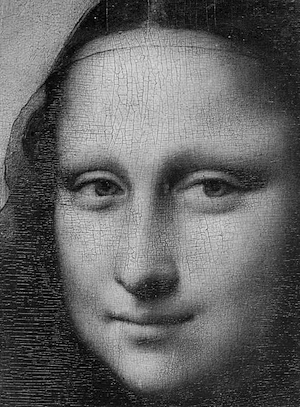

In [3]:
outputFilename = filename[:-4] + 'Poly.png'
imgInput = Image.open(filename)

# Turn image to grayscale
img = imgInput.convert('L')
display(img)

imageArray = np.asarray(img)

### Find number of pixels per tile and number of tiles across and down.

In [4]:
# retrieve size of image
width, height = img.size

# number of pixels across
pixelsPerTile = int(width/numberOfTilesAcross)
numberOfTilesDown = int(height/pixelsPerTile)

### Find the average grayscale for every tile over the image.

In [5]:
averageGray = np.zeros((numberOfTilesDown,numberOfTilesAcross))
for i in range(numberOfTilesDown):
    for j in range(numberOfTilesAcross):
        subMatrix = imageArray[i*pixelsPerTile:(i+1)*pixelsPerTile,j*pixelsPerTile:(j+1)*pixelsPerTile]
        averageGray[i,j] = np.average(np.average(subMatrix))

### Create the polynomial mosaic

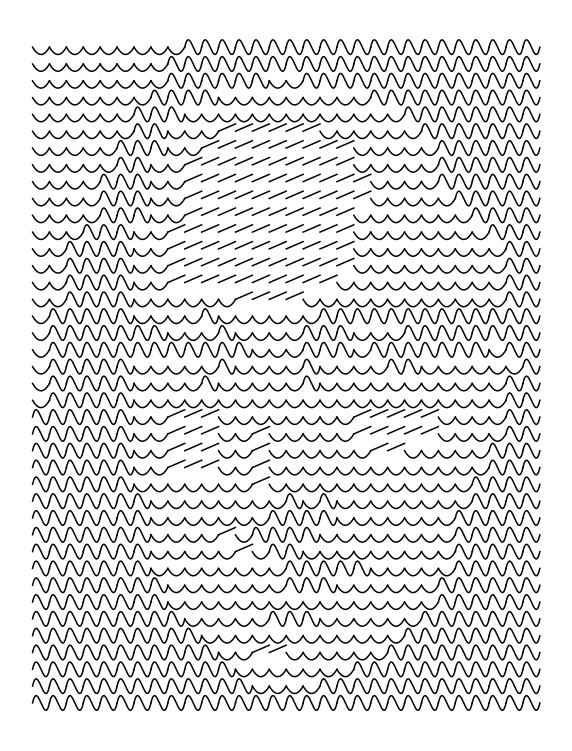

In [14]:
grayscaleIntervalSize = 256/numberOfPolys

scale = 10
figure(figsize=(scale,scale*height/width))

polyDistance = 2.3 # This parameter controls how much 
                   # overlap/space there is between polys
for i in range(numberOfTilesDown):
    for j in range(numberOfTilesAcross):
        grayScaleIntervalNumber = int((255-averageGray[i,j])/grayscaleIntervalSize) + 1
        # Construct a polynomial of grayScaleIntervalNumber between 0 and 1
        x = linspace(0,1,1000)
        # the roots are at 0 and 1 and equally spaced within the interval
        roots = linspace(0,1,grayScaleIntervalNumber) 
        y = 50*np.ones(1000)
        for k in range(grayScaleIntervalNumber):
           y *= (x-roots[k])
        if (np.max(abs(y)) > 0):
            y = y/np.max(abs(y))/polyDistance         
        plt.plot(x+j,y-i,"k-")

plt.axis('off')
plt.savefig(outputFilename,dpi=400,pad_inches=0,bbox_inches='tight')
plt.show()